# WeatherPy

### Analysis
-  Looking at the City Latitude vs Temperature scatterplot, it is made evident that the closer a city is to the equator (x-value = 0), the higher the temperature of the city is.
-  In City Latitude vs Humidity scatterplot, we see that there is no true correlation between a city's humidity and its latitude. Visualization shows that there are cities ranging from latitude -50 to latitude 70 that all have 100% humidity. 
-  Cloudiness % also does not appear to have a correlation to a city's latitude. However, a large population of the data had 0% cloudiness. Those cities may tend to be higher in temperature since there is no cloud coverage. Just a theory however.... would need further analysis to be determined. 
-  The majority of the randomly selected cities had a wind speed in the range of 0-10 mph. However, cities equal distance from the equator (latitudes -20 to -40; latitudes 20 to 40), on average, had a higher wind speed, reaching top speeds of over 35 mph.

In [1]:
#Install citipy library
!pip install citipy

#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time

from citipy import citipy
from pprint import pprint

#Import API key for OpenWeatherMapy
from config import owm_key

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Generate Cities List

In [2]:
#Create DataFrame
cities_df = pd.DataFrame()

#Add columns for City and Country
cities_df["City"] = ""
cities_df["Country"] = ""

#Generate 500+ random latitudes and longitudes, then add new columns and values to Dataframe
cities_df["Latitude"] = np.random.uniform(low=-90, high=90, size=1500)
cities_df["Longitude"] = np.random.uniform(low=-180, high=180, size=1500)
cities_df = round(cities_df, 2)

#Add columns to DataFrame for wanted values
cities_df["Temperature (F)"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Cloudiness (%)"] = ""
cities_df["Wind Speed (mph)"] = ""

#Find and add nearest city & country based on the randomly selected lat and lng
for index, row in cities_df.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities_df.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)

#Drop duplicate cities
cities_df.drop_duplicates(["City", "Country"], inplace=True)
cities_df.reset_index(inplace=True)

#Delete unneccesary column for aesthetics 
del cities_df["index"]

#Display updated DataFrame
cities_df.head()

C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,severo-kurilsk,ru,37.91,164.52,,,,
1,sakakah,sa,29.25,40.84,,,,
2,bluff,nz,-76.56,152.80,,,,
3,codrington,ag,24.48,-52.29,,,,
4,rikitea,pf,-19.14,-111.31,,,,


In [3]:
#Check to be sure we have 500+ cities for dataset
len(cities_df)

616

### Perform API Calls

In [4]:
#Config info
units = "imperial"

#Access the data from openweathermapy
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

for index, row in cities_df.iterrows():
    #Target URL
    query_url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=%s&appid=%s" % (row["City"], row["Country"], units, owm_key)
    
    #Print log of cities being processed
    print(f"Now retrieving City #" + str(index) + ": " + row["City"] + ", " + row["Country"])
    print(query_url)
    
    #Run requests to API
    weather_data = requests.get(query_url).json()
    
    #Use exceptional handling  to calculate and append values to DataFrame
    try:
        response = weather_data
        cities_df.set_value(index, "Temperature (F)", response["main"]["temp"])
        cities_df.set_value(index, "Humidity (%)", response["main"]["humidity"])
        cities_df.set_value(index, "Cloudiness (%)", response["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed (mph)", response["wind"]["speed"])
    except:
        print("Error with city data... Skipping")
    
    
print("---------------------------------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------------------------------")  

#Covert strings to floats for DataFrame
columns = ["Latitude", "Longitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors="coerce")

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving City #0: severo-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #1: sakakah, sa
http://api.openweathermap.org/data/2.5/weather?q=sakakah,sa&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #2: bluff, nz
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #3: codrington, ag
http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f


C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Error with city data... Skipping
Now retrieving City #4: rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #5: yingcheng, cn
http://api.openweathermap.org/data/2.5/weather?q=yingcheng,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #6: matagami, ca
http://api.openweathermap.org/data/2.5/weather?q=matagami,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #7: arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #8: kapaa, us
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #9: cape town, za
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #10: dingle, ie
http://ap

Now retrieving City #55: albany, au
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #56: karwar, in
http://api.openweathermap.org/data/2.5/weather?q=karwar,in&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #57: ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #58: torbay, ca
http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #59: coquimbo, cl
http://api.openweathermap.org/data/2.5/weather?q=coquimbo,cl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #60: karkaralinsk, kz
http://api.openweathermap.org/data/2.5/weather?q=karkaralinsk,kz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #61: port blair, in
http://api.open

Now retrieving City #107: harper, lr
http://api.openweathermap.org/data/2.5/weather?q=harper,lr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #108: warqla, dz
http://api.openweathermap.org/data/2.5/weather?q=warqla,dz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #109: north myrtle beach, us
http://api.openweathermap.org/data/2.5/weather?q=north myrtle beach,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #110: beypur, in
http://api.openweathermap.org/data/2.5/weather?q=beypur,in&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #111: puerto ayora, ec
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #112: grandview, us
http://api.openweathermap.org/data/2.5/weather?q=grandview,us&units=imperial&appid=bec2deb1e63f486b3e900db56

Now retrieving City #159: pangoa, pe
http://api.openweathermap.org/data/2.5/weather?q=pangoa,pe&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #160: naliya, in
http://api.openweathermap.org/data/2.5/weather?q=naliya,in&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #161: itarema, br
http://api.openweathermap.org/data/2.5/weather?q=itarema,br&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #162: upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #163: honningsvag, no
http://api.openweathermap.org/data/2.5/weather?q=honningsvag,no&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #164: ternate, id
http://api.openweathermap.org/data/2.5/weather?q=ternate,id&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #165: volkhovskiy, ru
http://api.openweathermap.org/data/2.5

Now retrieving City #214: lakes entrance, au
http://api.openweathermap.org/data/2.5/weather?q=lakes entrance,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #215: teguise, es
http://api.openweathermap.org/data/2.5/weather?q=teguise,es&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #216: kaili, cn
http://api.openweathermap.org/data/2.5/weather?q=kaili,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #217: bengkulu, id
http://api.openweathermap.org/data/2.5/weather?q=bengkulu,id&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #218: vaitupu, wf
http://api.openweathermap.org/data/2.5/weather?q=vaitupu,wf&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #219: lynn haven, us
http://api.openweathermap.org/data/2.5/weather?q=lynn haven,us&units=imperial&appid=bec2

Now retrieving City #268: erkner, de
http://api.openweathermap.org/data/2.5/weather?q=erkner,de&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #269: bose, cn
http://api.openweathermap.org/data/2.5/weather?q=bose,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #270: nome, us
http://api.openweathermap.org/data/2.5/weather?q=nome,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #271: saint anthony, ca
http://api.openweathermap.org/data/2.5/weather?q=saint anthony,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #272: viransehir, tr
http://api.openweathermap.org/data/2.5/weather?q=viransehir,tr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #273: caravelas, br
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving

Now retrieving City #320: bambui, br
http://api.openweathermap.org/data/2.5/weather?q=bambui,br&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #321: san ignacio, pe
http://api.openweathermap.org/data/2.5/weather?q=san ignacio,pe&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #322: ganta, lr
http://api.openweathermap.org/data/2.5/weather?q=ganta,lr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #323: lac-megantic, ca
http://api.openweathermap.org/data/2.5/weather?q=lac-megantic,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #324: boa vista, br
http://api.openweathermap.org/data/2.5/weather?q=boa vista,br&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #325: uruzgan, af
http://api.openweathermap.org/data/2.5/weather?q=uruzgan,af&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #326: broome, au
http://api.openweathermap.org/data/

Now retrieving City #373: lake havasu city, us
http://api.openweathermap.org/data/2.5/weather?q=lake havasu city,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #374: palabuhanratu, id
http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu,id&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #375: kaeo, nz
http://api.openweathermap.org/data/2.5/weather?q=kaeo,nz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #376: olafsvik, is
http://api.openweathermap.org/data/2.5/weather?q=olafsvik,is&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #377: tiznit, ma
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #378: pacific grove, us
http://api.openweathermap.org/data/2.5/weather?q=pacific grove,us&units=imperial&appid=bec2deb1e63f486b3e9

Now retrieving City #427: hasaki, jp
http://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #428: anaco, ve
http://api.openweathermap.org/data/2.5/weather?q=anaco,ve&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #429: ballangen, no
http://api.openweathermap.org/data/2.5/weather?q=ballangen,no&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #430: coihueco, cl
http://api.openweathermap.org/data/2.5/weather?q=coihueco,cl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #431: qaqortoq, gl
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #432: alofi, nu
http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #433: poum, nc
http://api.openweathermap.org/data/2.5/weather?q=poum,n

Now retrieving City #481: sao filipe, cv
http://api.openweathermap.org/data/2.5/weather?q=sao filipe,cv&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #482: bharatpur, in
http://api.openweathermap.org/data/2.5/weather?q=bharatpur,in&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #483: saint-francois, gp
http://api.openweathermap.org/data/2.5/weather?q=saint-francois,gp&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #484: northam, au
http://api.openweathermap.org/data/2.5/weather?q=northam,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #485: maloshuyka, ru
http://api.openweathermap.org/data/2.5/weather?q=maloshuyka,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #486: vila, vu
http://api.openweathermap.org/data/2.5/weather?q=vila,vu&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skippin

Now retrieving City #532: chipinge, zw
http://api.openweathermap.org/data/2.5/weather?q=chipinge,zw&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #533: jonesboro, us
http://api.openweathermap.org/data/2.5/weather?q=jonesboro,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #534: altay, cn
http://api.openweathermap.org/data/2.5/weather?q=altay,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #535: sydney, au
http://api.openweathermap.org/data/2.5/weather?q=sydney,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #536: bure, et
http://api.openweathermap.org/data/2.5/weather?q=bure,et&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #537: jiayuguan, cn
http://api.openweathermap.org/data/2.5/weather?q=jiayuguan,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #538: malyye derbety, ru
http://api.o

Now retrieving City #583: qasigiannguit, gl
http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #584: nelson bay, au
http://api.openweathermap.org/data/2.5/weather?q=nelson bay,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #585: acari, pe
http://api.openweathermap.org/data/2.5/weather?q=acari,pe&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #586: santa cruz, cr
http://api.openweathermap.org/data/2.5/weather?q=santa cruz,cr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #587: shimoda, jp
http://api.openweathermap.org/data/2.5/weather?q=shimoda,jp&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #588: maine-soroa, ne
http://api.openweathermap.org/data/2.5/weather?q=maine-soroa,ne&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #589: tual, id
http://api.openweathermap

In [5]:
#Drop NaN values from DataFrame
cities_df.dropna(inplace=True)

#Display final DataFrame
cities_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,severo-kurilsk,ru,37.91,164.52,34.24,92.0,68.0,13.11
2,bluff,nz,-76.56,152.80,59.04,97.0,76.0,22.84
4,rikitea,pf,-19.14,-111.31,80.28,100.0,88.0,13.56
5,yingcheng,cn,23.91,113.74,77.00,50.0,0.0,6.71
6,matagami,ca,50.53,-78.26,32.00,97.0,90.0,9.17


In [6]:
#Check for missing values in DataFrame
cities_df.count()

City                534
Country             534
Latitude            534
Longitude           534
Temperature (F)     534
Humidity (%)        534
Cloudiness (%)      534
Wind Speed (mph)    534
dtype: int64

In [7]:
#Export DataFrame as CSV
cities_df.to_csv("Output/city_weather_info.csv")

### Latitude vs Temperature Plot

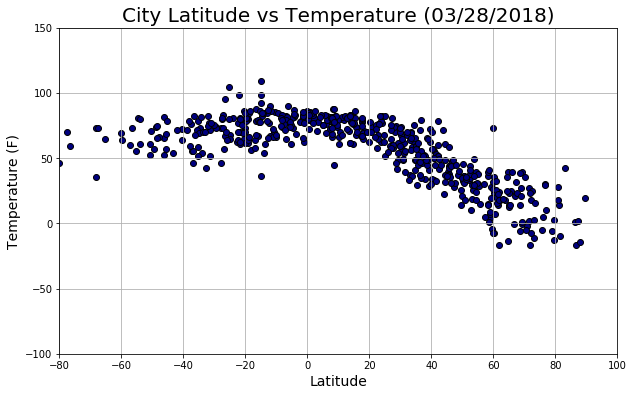

In [8]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Temperature (F)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="navy", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Temperature " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Temperature (F)", fontsize=14)
plt.ylim(-100,150)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Temperature.png")

plt.grid()
plt.show()

### Latitude vs Humidity Plot

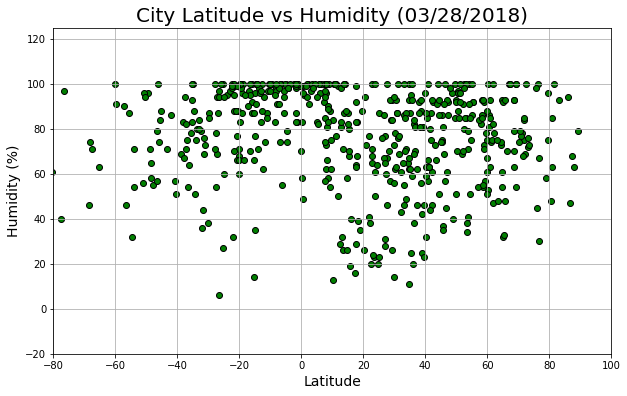

In [9]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Humidity (%)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="green", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Humidity " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Humidity (%)", fontsize=14)
plt.ylim(-20,125)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Humidity.png")

plt.grid()
plt.show()

### Latitude vs Cloudiness Plot

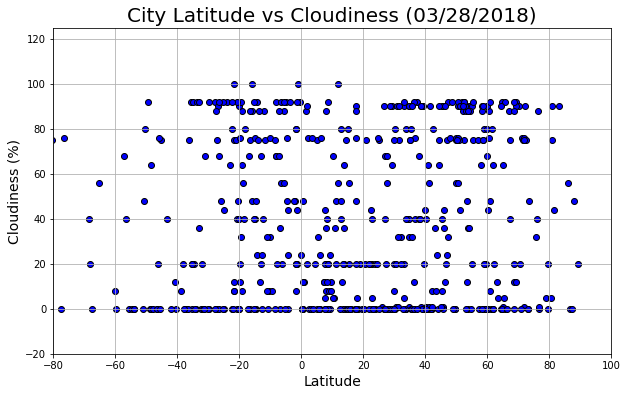

In [10]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Cloudiness (%)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Cloudiness " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.ylim(-20,125)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Cloudiness.png")

plt.grid()
plt.show()

### Latitude vs Wind Speed Plot

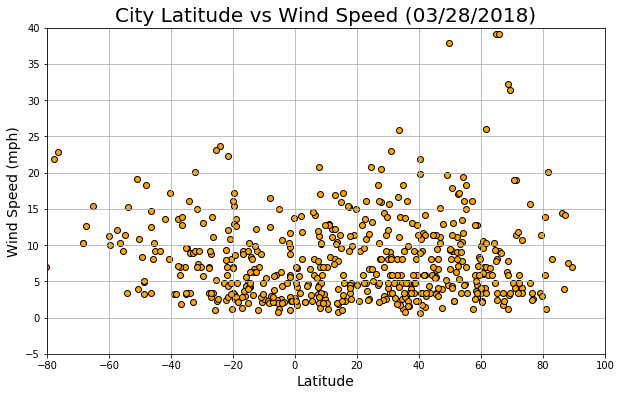

In [11]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Wind Speed (mph)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="orange", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Wind Speed " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.ylim(-5,40)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_WindSpeed.png")

plt.grid()
plt.show()